In [36]:
import numpy as np
import scipy

from math import sqrt
import sympy 
from sympy.utilities.lambdify import lambdify
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
np.set_printoptions(precision=3)

### Exercise 2

In [28]:
w,x1, x2, x3,x4,x5 = sympy.symbols('w,x1, x2, x3,x4,x5')
M = sympy.Matrix([[2,0,1,3,2,3],[3,w,0,2,-1,4],[3,-1,3,7,7,1]])
system = A, b = M[:, :-1], M[:, -1]
solutions_regular = sympy.linsolve(system, x1, x2,x3,x4,x5 )
display(solutions_regular)


FiniteSet(((8*w - 2*x4*(w - 1) + x5*(w - 1) - 4)/(3*(w - 1)), -4/(w - 1), -(7*w + 5*x4*(w - 1) + 8*x5*(w - 1) + 1)/(3*w - 3), x4, x5))

In [33]:
M = sympy.Matrix([[2,0,1,3,2],[3,w,0,2,-1],[3,-1,3,7,7]])
b = sympy.Matrix([3,4,1])
ν = 0.05

system = A, b = (M.T*M) + np.square(ν)*sympy.eye(5), M.T*b
solutions_tikhonov = sympy.linsolve(system, x1, x2,x3,x4,x5)


In [58]:

f_regular = lambdify(((w, x4, x5),), list(solutions_regular))
f_tikhonov = lambdify(((w, x4, x5),), list(solutions_tikhonov))

x = np.linspace(0,2,num=100)
ret_regular =f_regular((x,0,0))
ret_tikhonov =f_regular((x,0,0))

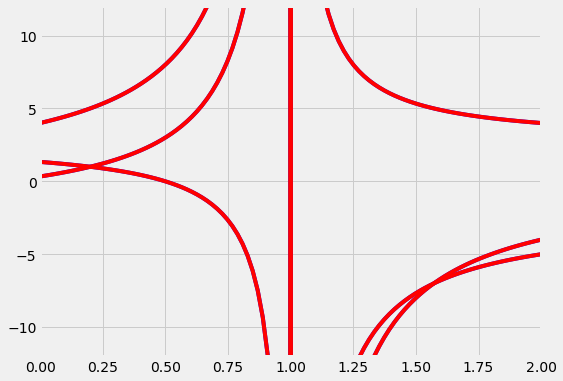

In [63]:

fig,ax = plt.subplots(1,1,figsize=(8,6))

plt.xlim([0,2])
plt.ylim([-12,12])
sns.lineplot(y=ret_regular[0][0],x=x,color ='b')
sns.lineplot(y=ret_regular[0][1],x=x,color ='b')
sns.lineplot(y=ret_regular[0][2],x=x,color ='b')



sns.lineplot(y=ret_tikhonov[0][0],x=x,color ='r')
sns.lineplot(y=ret_tikhonov[0][1],x=x,color ='r')
sns.lineplot(y=ret_tikhonov[0][2],x=x,color ='r')

